<a href="https://colab.research.google.com/github/AnuragGorkar/Breast_Cancer_Detection_using_SVM_and_KNN/blob/master/Breast_Cancer_Detection_using_SVM_and_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import numpy 
import matplotlib
import pandas
import sklearn
import seaborn as sns

print ("Python : {}".format(sys.version))
print ("Numpy : {}".format(numpy.__version__))
print ("matplotlib : {}".format(matplotlib.__version__))
print ("pandas : {}".format(pandas.__version__))
print ("sklearn : {}".format(sklearn.__version__))

Python : 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy : 1.16.5
matplotlib : 3.1.1
pandas : 0.25.1
sklearn : 0.21.3


In [0]:
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report , accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'univorm_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'singnle_epithelial_size', 'bare_nuclei',
       'bland-chromatin', 'normal-nucleloli', 'mitoses', 'class']
df = pd.read_csv(url,names = names)

In [0]:
df.replace('?', -99999, inplace = True)
df.drop(['id'], 1, inplace = True )
print(df.axes)
print(df.shape)


[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'univorm_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'singnle_epithelial_size', 'bare_nuclei',
       'bland-chromatin', 'normal-nucleloli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [0]:
print(df.loc[698])
print(df.describe())

clump_thickness             4
univorm_cell_size           8
uniform_cell_shape          8
marginal_adhesion           5
singnle_epithelial_size     4
bare_nuclei                 5
bland-chromatin            10
normal-nucleloli            4
mitoses                     1
class                       4
Name: 698, dtype: object
       clump_thickness  univorm_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  singnle_epithelial_size  bland-chromatin  \
count         699.0

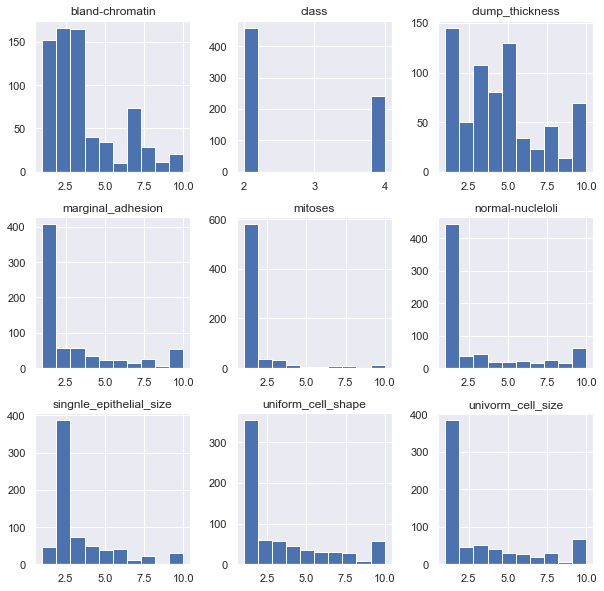

In [0]:
df.hist(figsize = (10,10))
plt.show()

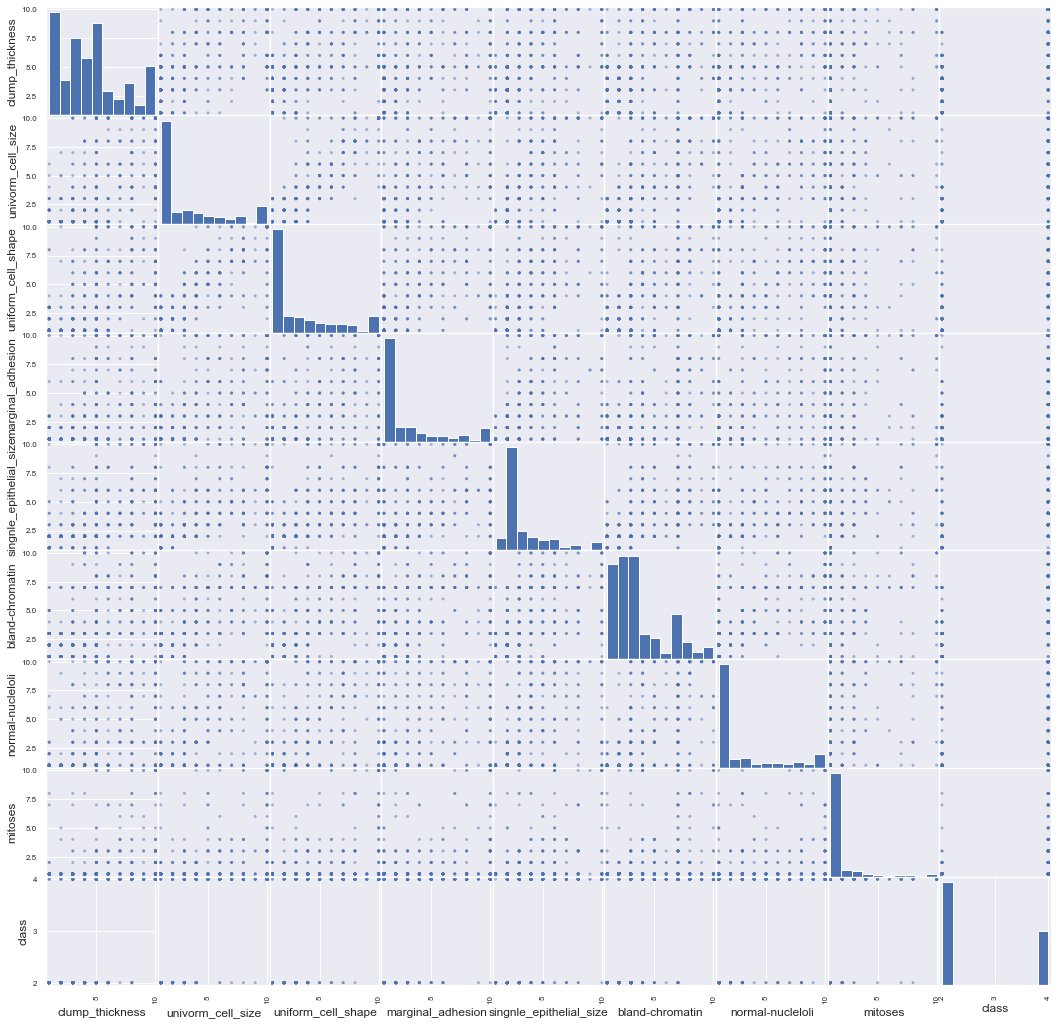

In [0]:
scatter_matrix(df , figsize = (18,18))
plt.show()

In [0]:
X = np.array(df.drop(['class'], 1))
Y = np.array(df["class"])
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.2)

In [0]:
seed = 9
scoring = "accuracy"

In [0]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM',SVC()))

results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv =kfold,  scoring = scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name} :: {cv_results.mean()} ({cv_results.std()})")

KNN :: 0.971396103896104 (0.026713282627058483)
SVM :: 0.9498701298701299 (0.03649997631792807)


In [0]:
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(Y_test, predictions))
    print(classification_report(Y_test, predictions))

KNN
0.9928571428571429
              precision    recall  f1-score   support

           2       0.99      1.00      0.99        91
           4       1.00      0.98      0.99        49

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140

SVM
0.9785714285714285
              precision    recall  f1-score   support

           2       1.00      0.97      0.98        91
           4       0.94      1.00      0.97        49

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [0]:
clf = SVC()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,10]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.9785714285714285
[4]


In [0]:
clf = KNeighborsClassifier(n_neighbors = 5)

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,10]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.9928571428571429
[2]
